In [1]:
#Importing other libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Importing Tensorflow
import tensorflow as tf
from tensorflow import keras
import os, cv2, random
!pip install tensorflow==2.8 
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


## AlexNet on CIFAR-10

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

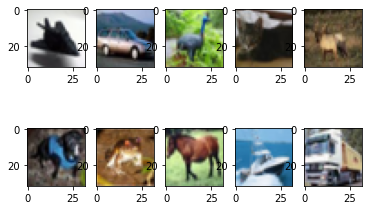

In [4]:
(x,id) = np.unique(y_train, return_index=True)
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[id[i]])

In [5]:
#Maximum Value
np.max(x_train[0])

255

In [6]:
#Minimum Value
np.min(x_train[0])

0

In [7]:
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test))

In [8]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))  
    return image,label

In [9]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [10]:
train_ds=(train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
test_ds=(test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32,drop_remainder=True))

In [11]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(7,7), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    ])

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 128)       18944     
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history=model.fit(train_ds,epochs=25,validation_data=test_ds,validation_freq=1)

Epoch 1/25
1562/1562 [==============================] - 36s 14ms/step - loss: 1.9327 - accuracy: 0.2957 - val_loss: 1.5103 - val_accuracy: 0.4614
Epoch 2/25
1562/1562 [==============================] - 20s 11ms/step - loss: 1.5421 - accuracy: 0.4441 - val_loss: 1.3393 - val_accuracy: 0.5176
Epoch 3/25
1562/1562 [==============================] - 20s 11ms/step - loss: 1.3675 - accuracy: 0.5092 - val_loss: 1.2336 - val_accuracy: 0.5597
Epoch 4/25
1562/1562 [==============================] - 20s 10ms/step - loss: 1.2481 - accuracy: 0.5546 - val_loss: 1.1530 - val_accuracy: 0.5892
Epoch 5/25
1562/1562 [==============================] - 22s 11ms/step - loss: 1.1507 - accuracy: 0.5924 - val_loss: 1.1017 - val_accuracy: 0.6107
Epoch 6/25
1562/1562 [==============================] - 20s 11ms/step - loss: 1.0648 - accuracy: 0.6211 - val_loss: 1.0582 - val_accuracy: 0.6313
Epoch 7/25
1562/1562 [==============================] - 20s 11ms/step - loss: 0.9927 - accuracy: 0.6507 - val_loss: 1.0191 -

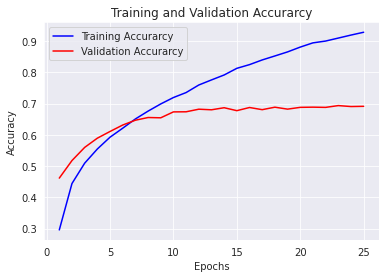

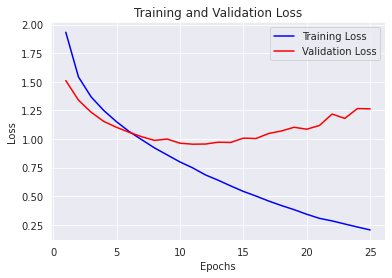

In [14]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6935096383094788


## AlexNet on Cats and Dogs

In [16]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 10:05:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.250.31.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   263MB/s    in 0.2s    

2022-08-19 10:05:26 (263 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagedatagenerator = ImageDataGenerator(rescale=1/255.0)
validation_imagedatagenerator = ImageDataGenerator(rescale=1/255.0)
train_imagedatagenerator = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_iterator = train_imagedatagenerator.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=200,
    class_mode='binary')

validation_iterator = validation_imagedatagenerator.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')  
    ])

In [21]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       46592     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [22]:
history = model2.fit(train_iterator,
                    validation_data=validation_iterator,
                    epochs=25)

Epoch 1/25
10/10 [==============================] - 32s 3s/step - loss: 7.1815 - accuracy: 0.5000 - val_loss: 0.7312 - val_accuracy: 0.5010
Epoch 2/25
10/10 [==============================] - 28s 3s/step - loss: 0.7511 - accuracy: 0.5505 - val_loss: 0.6977 - val_accuracy: 0.5360
Epoch 3/25
10/10 [==============================] - 28s 3s/step - loss: 0.7078 - accuracy: 0.5715 - val_loss: 0.7123 - val_accuracy: 0.4980
Epoch 4/25
10/10 [==============================] - 28s 3s/step - loss: 0.6817 - accuracy: 0.5900 - val_loss: 0.8117 - val_accuracy: 0.4900
Epoch 5/25
10/10 [==============================] - 28s 3s/step - loss: 0.6804 - accuracy: 0.5980 - val_loss: 0.7405 - val_accuracy: 0.4980
Epoch 6/25
10/10 [==============================] - 28s 3s/step - loss: 0.6697 - accuracy: 0.6070 - val_loss: 0.6937 - val_accuracy: 0.5390
Epoch 7/25
10/10 [==============================] - 28s 3s/step - loss: 0.6743 - accuracy: 0.6015 - val_loss: 0.7773 - val_accuracy: 0.5040
Epoch 8/25
10/10 [==

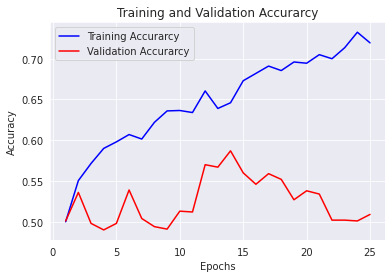

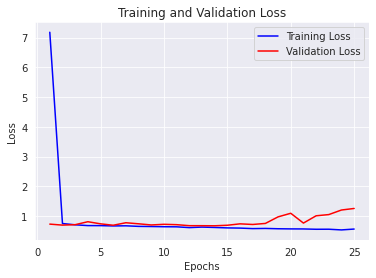

In [23]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [24]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.5870000123977661


## AlexNet on Horse2Zebra

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
!unzip gdrive/MyDrive/archive.zip

Archive:  gdrive/MyDrive/archive.zip
  inflating: metadata.csv            
  inflating: testA/n02381460_1000.jpg  
  inflating: testA/n02381460_1010.jpg  
  inflating: testA/n02381460_1030.jpg  
  inflating: testA/n02381460_1090.jpg  
  inflating: testA/n02381460_1100.jpg  
  inflating: testA/n02381460_1110.jpg  
  inflating: testA/n02381460_1120.jpg  
  inflating: testA/n02381460_1160.jpg  
  inflating: testA/n02381460_120.jpg  
  inflating: testA/n02381460_1210.jpg  
  inflating: testA/n02381460_1260.jpg  
  inflating: testA/n02381460_1300.jpg  
  inflating: testA/n02381460_1350.jpg  
  inflating: testA/n02381460_1360.jpg  
  inflating: testA/n02381460_140.jpg  
  inflating: testA/n02381460_1420.jpg  
  inflating: testA/n02381460_1540.jpg  
  inflating: testA/n02381460_1620.jpg  
  inflating: testA/n02381460_1630.jpg  
  inflating: testA/n02381460_1660.jpg  
  inflating: testA/n02381460_1690.jpg  
  inflating: testA/n02381460_1740.jpg  
  inflating: testA/n02381460_1750.jpg  
  infla

In [27]:
for d in ['testA', 'testB', 'trainA', 'trainB']:
    dpath=os.path.join(d)
    labels=[]
    filepaths=[]
    flist=os.listdir(dpath)
    for f in flist:
        fpath=os.path.join(dpath,f)
        filepaths.append(fpath)
        if d=='testA' or d == 'trainA':
            labels.append('horse')
        else:
            labels.append('zebra')
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    if d== 'testA':
        test_dfA=pd.concat([Fseries, Lseries], axis=1)
    elif d == 'testB':
        test_dfB=pd.concat([Fseries, Lseries], axis=1)
    elif d == 'trainA':
        dfA=pd.concat([Fseries, Lseries], axis=1)
    else:
        dfB=pd.concat([Fseries, Lseries], axis=1)
test_df=pd.concat([test_dfA, test_dfB], axis=0).reset_index(drop=True)
df=pd.concat([dfA, dfB], axis=0).reset_index(drop=True)
print (df['labels'].value_counts())
print (len(df))
print(test_df['labels'].value_counts())

zebra    1334
horse    1067
Name: labels, dtype: int64
2401
zebra    140
horse    120
Name: labels, dtype: int64


In [28]:
from sklearn.model_selection import train_test_split
train_split=.9
train_df, valid_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
print ('train samples: ', len(train_df),  ' validation samples', len(valid_df))
print (train_df['labels'].value_counts())

train samples:  2160  validation samples 241
zebra    1194
horse     966
Name: labels, dtype: int64


In [29]:
file_count = 966
samples = []
for category in df['labels'].unique():    
    category_slice = df.query("labels == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print (  df['labels'].value_counts())
print (len(df))

horse    966
zebra    966
Name: labels, dtype: int64
1932


In [30]:
height=227
width=227
channels=3
batch_size=80
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
trgen=ImageDataGenerator(preprocessing_function=scalar)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(len(train_gen.labels)/batch_size)

test batch size:  65   test steps:  4
Found 2160 validated image filenames belonging to 2 classes.
Found 260 validated image filenames belonging to 2 classes.
Found 241 validated image filenames belonging to 2 classes.


In [31]:
model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')  
    ])

In [32]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 128)       46592     
                                                                 
 batch_normalization_10 (Bat  (None, 55, 55, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       819456    
                                                                 
 batch_normalization_11 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [33]:
history=model3.fit(x=train_gen,  epochs=25, verbose=1,  validation_data=valid_gen)

Epoch 1/25
27/27 [==============================] - 10s 295ms/step - loss: 4.0361 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/25
27/27 [==============================] - 7s 245ms/step - loss: 0.6993 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/25
27/27 [==============================] - 7s 249ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/25
27/27 [==============================] - 7s 273ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/25
27/27 [==============================] - 7s 248ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/25
27/27 [==============================] - 7s 248ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/25
27/27 [==============================] - 7s 248ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch

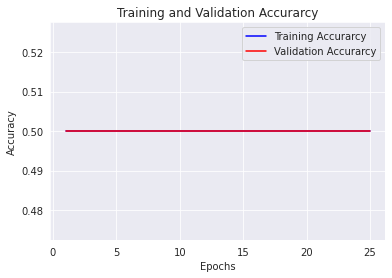

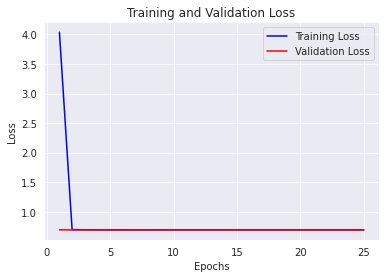

In [34]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [35]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.5


In [36]:
print('Loss Score = ',np.max(history.history['val_loss']))

Loss Score =  0.694925844669342
